In [2]:
import numpy as np
from scipy import stats                  # statistical methods
from matplotlib import pyplot as plt     # plotting methods
import pandas as pd
%matplotlib inline
import scipy.io                          # includes matlab
import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy


# GLM V - Logistische Regression
- Dichotome / binäre abhängige Variable
- Bernoulli-Verteilung
- Binomialverteilung: **Binomial-Familie**
- Parametrisierung
- Toleranzverteilung und **Link-Funktion**
    - Linear
    - Logit
    - Probit
    - komplementäre-Log-Log
- Beispiele
    - LD50
    - Psychophysik
- `statsmodels` mit `family=binomial`
- Zusammenfassung

# Bernoulli-Experiment
Ereignis $A$ *tritt ein* oder *tritt nicht ein* $\Omega = \{A, \bar{A}\}$

Binäre Zufallsvariable $Z$ "*Indikatorvariable*" kann nur Werte $\omega \in \{0, 1\}$ annehmen.
$$Z = \begin{cases}
1 \quad & \text{wenn A zutrifft}\\
0 \quad & \text{wenn A nicht zutrifft}
\end{cases}$$
#### Beispiele
- Münzwurf: Kopf / Zahl
- Produktion: innerhalb Toleranz / Ausschuß
- Geburten: Mädchen / Jungen
- Psychophysik: gesehen / nicht gesehen

## Bernoulli-Verteilung
Die Wahrscheinlickeit für $A$ sei $\pi$
$$\begin{align}
P(A)       \; &= P(Z\!=\!1) \: =& \; \pi    \\
P(\bar{A}) \; &= P(Z\!=\!0) \; =& \; 1-\pi
\end{align}$$
Schreibweise 
$$P(Z) = \pi^Z(1-\pi)^{1-Z}$$

n unabhängige Zufallsvariablen $Z_1\dots Z_n$ mit Einzel-Wahrscheinlichkeiten $P(Z_i)=\pi_i$ haben eine gemeinsame Verbund-Wahrscheinlichkeitsverteilung

$$\prod \pi_j^{Z_j}(1-\pi_j)^{(1-Z_j)} = \exp\Bigl[{\sum_{j=1}^{n}Z_j \log \Bigl(\frac{\pi_j}{1-\pi_j}\Bigr) + \sum_{j=1}^{n} \log \Bigl(1-\pi_j\Bigr)}\Bigr] $$
welche Mitglied der kanonischen Exponentialfamilie ist


#### Im 1. Spezialfall gleicher Wahrscheinlichkeiten
$$\pi_i = \pi$$
ergibt sich für die Zufallsvariable *Anzahl der Erfolge*
$$Y = \sum_{i=1}^{n}Z_i$$
## die Binomialverteilung
$$P(Y\!=\!y) = {n \choose y} \pi^{y}(1-\pi)^{n-y}$$
wobei $y\in[0\dots n]$

Die Log-Likelihood ist
$$l(\pi;y) = y\ln\bigl(\frac{\pi}{1-\pi}\bigr)+n \ln\bigl( 1-\pi \bigr) + \ln {n \choose y}$$

#### Im 2. allgemeineren Fall mit $N$ Kategorien
Bei N kategorial unterschiedlichen Wahrscheinlichkeiten summiert sich die Log-Likelihood
$$l(\pi_1,\dots,\pi_N;y_1,\dots ,y_N) = \sum_{j=1}^{N} \Bigl( y_j\ln\bigl(\frac{\pi_j}{1-\pi_j}\bigr)+n_j \ln\bigl( 1-\pi_j \bigr) + \ln {n_j \choose y_j} \Bigr)$$

mit in jeder Kategorie $j$
- $y_j\quad $ Erfolge
- $n_j-y_j$ Misserfolge

## Beschreiben als *Generalisiertes Lineares Modell* der *Erfolgsrate*
Zufallsvariable $P_j = \frac{Y_j}{n_j}$ 

mit Erwartungswert $\mathcal{E}(Y_j) = n_j\pi_j\quad \Rightarrow\quad \mathcal{E}(P_j) = \pi_j$

sei abhängig von erklärenden Variablen/Kategorien.
$$g(\pi_j) = \mathbf{x}_i^T\boldsymbol\beta$$

## 1. Lineares Modell
$$\pi_j = \mathbf{x}_i^T\boldsymbol\beta$$
unangemessen (Siehe Bsp. Piloten-Ohnmacht: Grenzwertüberschreitung)

## Begrenzung: Beschränken auf eine Verteilungsfunktion (*cdf*)
<br>
$$\pi = F(t) = \int_{-\infty}^{t} f(s)\mathrm{d}s$$
- $f(s) \geq 0\quad$ nicht-negative Wahrscheinlichkeit
- $\int_{-\infty}^{\infty} = 1\quad$ Normierung
- "*Toleranzverteilung*"

## 2. Beschränkt-Lineares Modell
Wählt man als Toleranzverteilung die Rechteckverteilung
$$f(s) = \begin{cases}
\frac{1}{c_2-c_1} \quad & \text{wenn} \;c_1\leq s\leq c_2\\
0 \quad & \text{sonst}
\end{cases}$$


dann ist $\pi$ kummulativ in x
$$\pi = \int_{c_1}^{x}f(s)\mathrm{d}s = \frac{x-c_1}{c_2-c_1}\qquad \text{für}\; c_1\leq s\leq c_2$$
bzw.
$$\pi=\beta_0+\beta_1 x$$
mit $\beta_0=\frac{-c_1}{c_2-c_1}$ und $\beta_1=\frac{1}{c_2-c_1}$

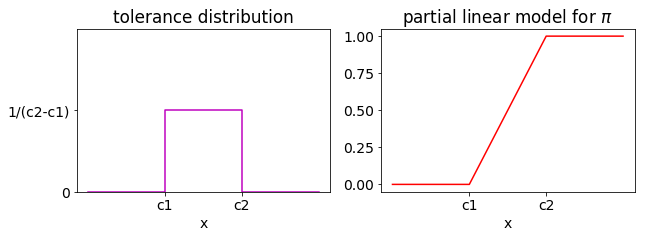

In [4]:
'''
partially linear
'''
f=plt.figure(figsize=(10,3))
# left plot: pdf
f.add_subplot(1, 2, 1)
plt.plot([-2, 0, 0, 2, 2, 4], [0, 0, 1, 1, 0, 0], 'm-')
plt.title('tolerance distribution')
plt.xticks([0, 2], ['c1', 'c2'])
plt.yticks([0, 1], ['0', '1/(c2-c1)'])
plt.ylim(0, 2)
plt.xlabel('x')
# right plot: cdf
f.add_subplot(1, 2, 2)
plt.plot([-2, 0, 2, 4], [0, 0, 1, 1], 'r-')
plt.title('partial linear model for $\pi$')
plt.xticks([0, 2], ['c1', 'c2'])
plt.xlabel('x');


... wird selten benutzt

## 3. Probit Modell
Wählt man als Toleranzverteilung die Normalverteilung
$$f(s) = \mathcal{N}(\mu, \sigma^2)$$
erhält man
$$\pi = \Phi\left(\frac{x-\mu}{\sigma}\right)$$


Damit erhält man die gewünschte lineare Abhängigkeit von $x$

$$g(\pi) = \Phi^{-1}(\pi) = \beta_0+\beta_1x$$
mit $\beta_0 = \frac{-\mu}{\sigma}$ und $\beta_1=\frac{1}{\sigma}$

Dieses Modell kommt häufig in Biologie und Sozialwissenschaften vor.

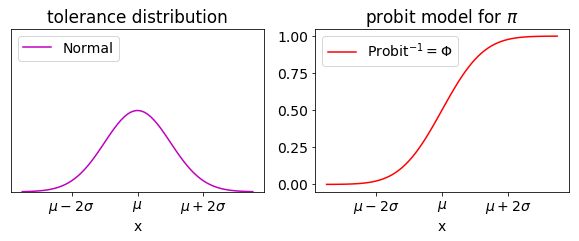

In [5]:
'''probit'''
f=plt.figure(figsize=(10,3))
distrib = stats.norm(0, 1)
# left plot: pdf
f.add_subplot(1, 2, 1)
plt.title('tolerance distribution')
xgrid = np.linspace(-3.5, 3.5, 71)
plt.plot(xgrid, distrib.pdf(xgrid), 'm-', label='Normal')
plt.xticks([-2, 0, 2], ['$\mu-2\sigma$', '$\mu$', '$\mu+2\sigma$'])
plt.yticks([], [])
plt.ylim(0, 0.8)
plt.xlabel('x')
plt.legend(loc='upper left')
# right plot: cdf
f.add_subplot(1, 2, 2)
plt.title('probit model for $\pi$')
plt.plot(xgrid, distrib.cdf(xgrid), 'r-', label='Probit$^{-1} = \Phi$')
plt.xticks([-2, 0, 2], ['$\mu-2\sigma$', '$\mu$', '$\mu+2\sigma$'])
plt.legend(loc='upper left')
plt.xlabel('x');


### Interpretation: versteckte Variable

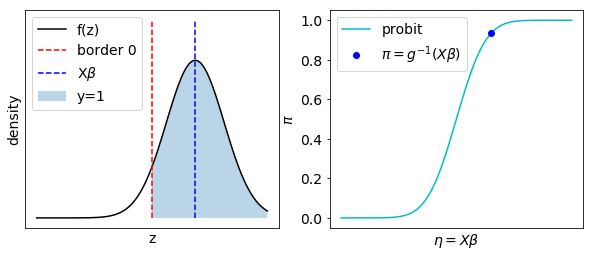

In [6]:
'''
interpretation of probit as gaussian distributed hidden variable
'''
f=plt.figure(figsize=(10,4))
# left plot: pdf
f.add_subplot(1, 2, 1)
mu, sigma = (1.5, 1.0)
zgrid = np.linspace(-4, 4, 81)
plt.plot(zgrid, stats.norm(mu, sigma).pdf(zgrid), 'k-', label='f(z)')
zgrid = zgrid[zgrid>=0]
plt.fill_between(zgrid, 0, stats.norm(mu, sigma).pdf(zgrid), alpha=.3, label='y=1')
plt.plot(2*[0], [0., .5], 'r--', label='border 0')
plt.plot(2*[mu], [0., .5], 'b--', label='X$\\beta$')
plt.xlabel('z')
plt.ylabel('density')
plt.xticks([], [])
plt.yticks([], [])
plt.legend(loc='upper left');

'''
the probit function
    either scalar or vector as input x and output logit(x)
'''
def probit(x):
    return stats.norm(0, 1).cdf(x)

# right plot: cdf
f.add_subplot(1, 2, 2)
zgrid = np.linspace(-5, 5, 101)
plt.plot(zgrid, probit(zgrid), 'c-', label='probit')
plt.plot([mu], probit(mu), 'bo', label='$\pi=g^{-1}(X\\beta$)')
plt.xlabel('$\\eta=X\\beta$')
plt.ylabel('$\\pi$')
plt.xticks([], [])
plt.legend(loc='upper left');


## 4. Logistisches Modell / Logit
Wählt man als Toleranzverteilung 

$$f(s) = \frac{\beta_1 \exp (\beta_0+\beta_1 s)}{\bigl(1+\exp(\beta_0+\beta_1 s)\bigr)^2}$$
womit
$$\pi = \int_{-\infty}^{x} f(s)\mathrm{d}s = \frac{\beta_1 \exp (\beta_0+\beta_1 s)}{1+\exp(\beta_0+\beta_1 s)}$$

dann erhält man die gewünschte lineare Abhängigkeit von $x$ mittels *Logit-Funktion*

$$g(\pi) = \ln\frac{\pi}{1-\pi} = \beta_0+\beta_1x$$

welche als logarithmisches Chancenverhältnis "*log-odds-ratio*" interpretiert werden kann.

Wird oft benutzt, vor allem für Binomial-verteilte Daten, deren *natürliche* Link-Funktion.

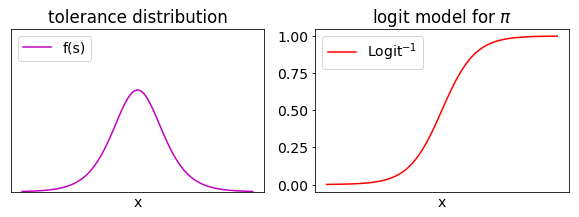

In [6]:
'''logit'''

## 5. Extremwertverteilung / c-log-log
Wählt man als Toleranzverteilung die Extremwertverteilung

$$f(s) = \beta_1 \exp \Bigl( (\beta_0+\beta_1 s) - \exp(\beta_0+\beta_1 s) \Bigr)$$
damit
$$\pi = 1 - \exp \bigl( -\exp (\beta_0+\beta_1 t) \bigr)$$

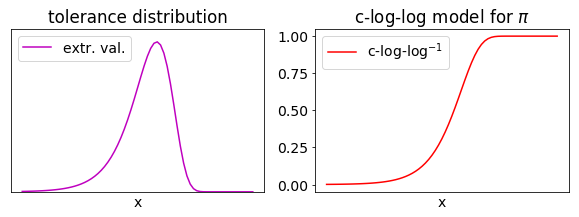

In [7]:
'''complementary log log'''

Mit der komplementären Log-Log-Funktion erhält man die gewünschte lineare Abhängigkeit

$$g(\pi) = \log\bigl(-\log(1-\pi)\bigr) = \beta_0+\beta_1 x$$

Dies ist die *komplementäre-Log-Log-Funktion*

# Beispiel: Sterberate vs. Dosis
Käfer wurden einem Gift ausgesetzt, woran sie in Abhängigkeit von der Konzentration $\log_{10}\frac{mg}{l}$ starben [Bliss, 1935]:

#### Fragestellung
- Was ist die 50%-Lethaldosis *LD50*?

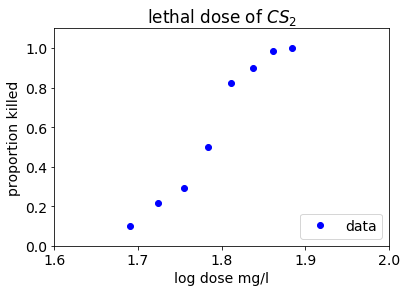

In [9]:
'''example for estimators and their distribution
   find Lethal Dose 50%'''
logdose = np.asarray([1.691, 1.724, 1.755, 1.784, 1.811, 1.837, 1.861, 1.884])
n       = np.asarray([59,    60,    62,    56,    63,    59,    62,    60   ])
killed  = np.asarray([ 6,    13,    18,    28,    52,    53,    61,    60   ])
plt.plot(logdose, killed/n, 'bo', label='data')
plt.axis((1.6, 2.0, 0., 1.1))
plt.title('lethal dose of $CS_2$')
plt.xlabel('log dose mg/l')
plt.ylabel('proportion killed')
plt.legend(loc='lower right');


In [10]:
y = np.vstack((killed, n-killed)).T   # killed and survived
y


array([[ 6, 53],
       [13, 47],
       [18, 44],
       [28, 28],
       [52, 11],
       [53,  6],
       [61,  1],
       [60,  0]])

## Lösung mittels Logit-Link

In [11]:
# supplies the 1's to the design matrix with x=dose
X = sm.add_constant(logdose)
# y as 2D data: ["success", "failure"]
y = np.vstack((killed, n-killed)).T

# supply data to logit model and call fit:
# start-values, iterate, calculate statistics ...
lfit = sm.GLM(endog=y, exog=X, family=sm.families.Binomial(
    link=sm.families.links.logit)).fit()


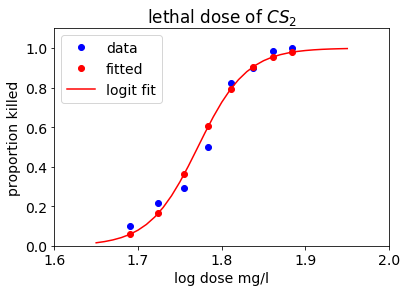

In [12]:
'''show result of fit together with data'''
# data
plt.plot(logdose, killed/n, 'bo', label='data')
# fitted@data
plt.plot(logdose, lfit.fittedvalues, 'ro', label='fitted')
# whole ROI for doses
dgrid = np.linspace(1.65, 1.95, 30+1)
# with intercept-constant...
xgrid = sm.add_constant(dgrid)
# ... for prediction
plt.plot(dgrid, lfit.predict(xgrid), 'r-', label='logit fit')
plt.axis((1.6, 2.0, 0., 1.1))
plt.title('lethal dose of $CS_2$')
plt.xlabel('log dose mg/l')
plt.ylabel('proportion killed')
plt.legend(loc='upper left');


In [13]:
# print result: parameter vector beta, statistics, ...
print(lfit.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:           ['y1', 'y2']   No. Observations:                    8
Model:                            GLM   Df Residuals:                        6
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -18.657
Date:                Fri, 02 Mar 2018   Deviance:                       11.116
Time:                        18:22:04   Pearson chi2:                    0.167
No. Iterations:                     6                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -60.7401      5.182    -11.722      0.000     -70.896     -50.584
x1            34.2859      2.913     11.769      0.0

## Ergebnis:
Der Max-Likelihood-Parameter-Vektor-Schätzer ist 
$$\widehat{\boldsymbol\beta} = \begin{bmatrix} -60.7 \\ 34.3 \end{bmatrix} \qquad 
  \widehat{\boldsymbol\beta}_{95\%CI} = \begin{bmatrix} -70.9 \dots -50.6 \\ 28.6 \dots 40.0 \end{bmatrix} $$


In [14]:
'''alternatively use patsy formula style; don't forget the weights'''
dataf = pd.DataFrame({'y': killed/n, 
                      'x': logdose   })
zfitf = smf.glm('y ~ x' , dataf, 
                 family=sm.families.Binomial(link=sm.families.links.logit),
                 freq_weights=n
               ).fit()


    help(sm.families.Binomial)
        If `endog` is a 2d array, then the input is assumed to be in the format
        (successes, failures) and successes/(success + failures) is returned.  
        And n is set to successes + failures.
 
http://www.statsmodels.org/devel/generated/statsmodels.genmod.generalized_linear_model.GLM.html

    help(smf.glm)
        *args, **kwargs

    freq_weights : array-like
        1d array of frequency weights. The default is None. If None is selected or a blank 
        value, then the algorithm will replace with an array of 1’s with length equal to 
        the endog. 
        WARNING: Using weights is not verified yet for all possible options and results

In [15]:
print(zfitf.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                    8
Model:                            GLM   Df Residuals:                      479
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -186.18
Date:                Fri, 02 Mar 2018   Deviance:                       1052.6
Time:                        18:22:16   Pearson chi2:                     9.91
No. Iterations:                     7                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -60.7401      5.182    -11.722      0.000     -70.896     -50.584
x             34.2859      2.913     11.769      0.0

## Frage: Wie groß ist die LD50?
Ab welcher Dosis sterben mehr als die Hälfte der Käfer?

In [16]:
'''LD50'''
# 50% will be killed according to model
pi = .5
# special case ld50: g(pi) = log(1) = 0
y_ld50 = np.log(pi/(1-pi))
# fitted intercept and gain
b, m = lfit.params
# reverse of y=mx+b; still log
xld50 = (y_ld50-b)/m
# transform log result to 10^x
print('The ld50 is {:.1f}mg/l'.format(10**xld50))


The ld50 is 59.1mg/l


## Frage: Vertrauensbereich der LD50?
Wie verlässlich ist die LD50-Angabe? Suche das 95% Konfidenzintervall.

**[ÜA]** Bitte nochmals klar machen, was Konfidenzintervall bedeutet!

In [17]:
'''y sem?'''
# sem of params "b"
db, dm = lfit.bse
print('m={:.2f}(+/-{:.2f})  b={:.2f}(+/-{:.2f})'.format(m, dm, b, db))
# now with 95% CI
db, dm = stats.norm.ppf(.975)*lfit.bse


m=34.29(+/-2.91)  b=-60.74(+/-5.18)


#### Ist es möglich, auf y zurückzurechnen?

Für Normalverteilte Werte gilt das Gauß'sche Fehlerfortpflanzungsgesetz. Hier nicht.

#### Ausweg: "worst case"

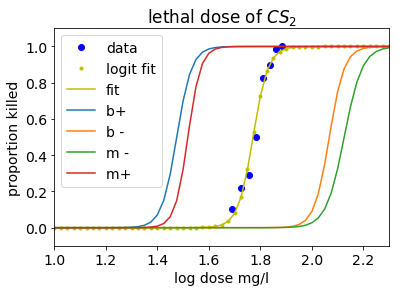

In [18]:
'''show confidence interval ??'''

def logit(x, beta):
    eta = beta[0] + beta[1]*x
    return np.exp(eta)/(1+np.exp(eta))

# data
plt.plot(logdose, killed/n, 'bo', label='data')
# whole ROI for doses
dgrid = np.linspace(1.0, 2.5, 60+1)
# with intercept-constant...
xgrid = sm.add_constant(dgrid)
# ... for prediction
plt.plot(dgrid, lfit.predict(xgrid), 'y.', label='logit fit')
plt.plot(dgrid, logit(dgrid, [b, m]), 'y-', label='fit')
plt.plot(dgrid, logit(dgrid, [b+db, m]), label='b+ ')
plt.plot(dgrid, logit(dgrid, [b-db, m]), label='b -')
plt.plot(dgrid, logit(dgrid, [b, m-dm]), label='m -')
plt.plot(dgrid, logit(dgrid, [b, m+dm]), label='m+ ')

plt.axis((1.0, 2.3, -0.1, 1.1))
plt.title('lethal dose of $CS_2$')
plt.xlabel('log dose mg/l')
plt.ylabel('proportion killed')
plt.legend(loc='upper left');


### Diskrepanz zwischen Daten und Modell

#### Grund: Parameter korrelieren

In [25]:
print(zfitf.cov_params())


           Intercept          x
Intercept   26.85188 -15.091140
x          -15.09114   8.486842


#### Ursache:
Lineare Vorhersage für $\eta$ geht vom Ursprung aus: Konzentration $log(dose)=0$
- Eine kleine Änderung in der Steigung bewirkt eine große Änderung von $\eta$
- Eine Änderung im Achsenabschnitt bewirkt eine Verschiebung
- Fit benötigt Variation beider
    - breite Randverteilungen

#### Abhilfe
Modellparametrisierung entkoppeln durch Zentrieren

Im Mittelpunkt der Datenwolke sind Steigung und Achsenabschnitt unabhängig
$$x\rightarrow x-x_0$$

In [19]:
'''
show confidence interval with centralized data
 - no correlation between gain & intercept
'''
# the estimate of center from before
mdose = xld50
# supplies the 1's to the design matrix (with x=dose around zero)
Xz = sm.add_constant(logdose-mdose)
# y as 2D data: ["success", "failure"]  (keep as is)
yz = np.vstack((killed, n-killed)).T
zfit = sm.GLM(endog=yz, exog=Xz, family=sm.families
    .Binomial(link=sm.families.links.logit)).fit()


In [20]:
print(zfit.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:           ['y1', 'y2']   No. Observations:                    8
Model:                            GLM   Df Residuals:                        6
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -18.657
Date:                Fri, 02 Mar 2018   Deviance:                       11.116
Time:                        18:23:00   Pearson chi2:                    0.167
No. Iterations:                     6                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.038e-15      0.132  -3.81e-14      1.000      -0.259       0.259
x1            34.2859      2.913     11.769      0.0

                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
    ------------------------------------------------------------------------------
    const        -1.3e-14      0.132   -9.7e-14      1.000        -0.259     0.259    centralized
    x1            34.2859      2.913     11.769      0.000        28.576    39.996
    ------------------------------------------------------------------------------
    const        -60.7401      5.182    -11.722      0.000       -70.896   -50.584    original 
    x1            34.2859      2.913     11.769      0.000        28.576    39.996

#### Ergebnis Zentrierung
- Der Achsenabschnitt verschwindet wie erwartet
    - sein 95%-Konfidenzintervall ist deutlich enger
    - er ist nicht signifikant
- Einziger linearer Parameter $\beta_1$ behält seinen ursrpünglichen Wert
     - ebenso sein 95%-Konfidenzintervall

### 95%-Konfidenzintervall näherungsweise
Damit ergibt die "worst case" Abschätzung

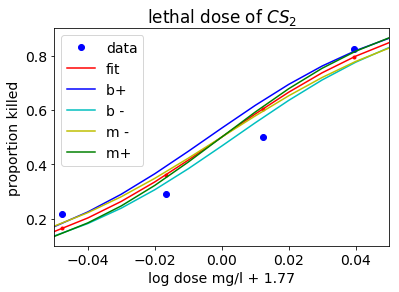

In [21]:
'''show centralized fit and influence of "confident" parameters'''
b, m = zfit.params
db, dm = zfit.bse
plt.plot(Xz[:,1], yz[:,0]/n, 'bo', label='data')        # data 
dgrid = np.linspace(-1.0, 1.5, 250+1)                   # whole ROI for doses
xgrid = sm.add_constant(dgrid)                          # with intercept-constant...
plt.plot(Xz[:,1], zfit.predict(sm.add_constant(Xz[:,1])), 'r.') 
plt.plot(dgrid, logit(dgrid, [b, m]),    'r-', label='fit')
plt.plot(dgrid, logit(dgrid, [b+db, m]), 'b-', label='b+ ')
plt.plot(dgrid, logit(dgrid, [b-db, m]), 'c-', label='b -')
plt.plot(dgrid, logit(dgrid, [b, m-dm]), 'y-', label='m -')
plt.plot(dgrid, logit(dgrid, [b, m+dm]), 'g-', label='m+ ')
plt.axis(( -0.05, .05, 0.1, .9))
plt.title('lethal dose of $CS_2$')
plt.xlabel('log dose mg/l + {:.2f}'.format(mdose))
plt.ylabel('proportion killed')
plt.legend(loc='upper left');


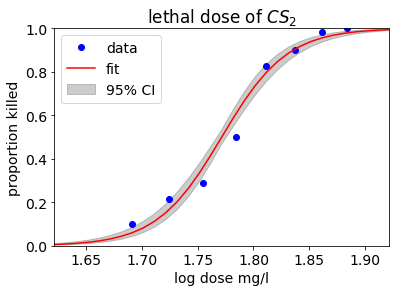

In [22]:
'''again'''
plt.plot(logdose,     yz[:,0]/n,            'bo', label='data')   
plt.plot(dgrid+mdose, logit(dgrid, [b, m]), 'r-', label='fit')

# find min and max within all possible "worst case" confident interval solutions
pij = np.asarray(
    [logit(dgrid, [bi, mj])  for bi in [b-db, b, b+db] for mj in [m-dm, m, m+dm]])
pmax = pij.max(axis=0)                  # upper "worst case" border 
pmin = pij.min(axis=0)                  # lower -"-
plt.fill_between(
    dgrid+mdose, pmin, pmax, color='k', alpha=0.2, label='95% CI')

plt.axis(( mdose-0.15, mdose+.15, 0., 1.))
plt.title('lethal dose of $CS_2$')
plt.xlabel('log dose mg/l')
plt.ylabel('proportion killed')
plt.legend(loc='upper left');


## Interpretation als Verdünnungsreihe

- Ausgangskonzentration eines Gifts $\rho_0$
- Unabhängige Variable: Verdünnungsfaktor zB. halbieren je Schritt $x$: $$\rho_x = \rho_0 \frac{1}{2^x}$$
- Logarithmieren linearisiert die Abhängigkeit von $x$
$$\ln(\rho_x) = \ln(\rho_0) - \color{green}{x} \ln (2)$$

## (Zwischen) Ergebnis
- Parameterschätzer und Konfidenzintervall durch GLM bestimmen
- Konfidenzintervall für Daten
    - wenn bekannt: bei Normalverteilung t-verteilt
    - wenn unbekannt: 
        - Simulieren
        - "worst case" Abschätzen durch **unabhängige** Parametrisierung

- Logit-Modell beschreibt Dosisabhängigkeit gut
    - logarithmische Abhängigkeit sorgt für Linearität in der Verdünnungsreihe

## Andere Link-Funktion

### Probit


In [23]:
'''same same, but probit'''
# supply data to probit model and call fit:
#     start-values, iterate, calculate statistics ...
pfit = sm.GLM(
    endog=yz, exog=Xz, family=sm.families
            .Binomial(link=sm.families.links.probit)).fit()
# print result: parameter vector beta, statistics, ...
print(pfit.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:           ['y1', 'y2']   No. Observations:                    8
Model:                            GLM   Df Residuals:                        6
Model Family:                Binomial   Df Model:                            1
Link Function:                 probit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -18.092
Date:                Wed, 03 May 2017   Deviance:                       9.9870
Time:                        10:17:54   Pearson chi2:                    0.158
No. Iterations:                     6                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0166      0.075      0.222      0.824      -0.130       0.163
x1            19.7410      1.488     13.266      0.0

### Extremwertverteilung (komplementäre-log-log)

In [24]:
'''same same, but extreme values'''
# supply data to probit model and call fit:
#    start-values, iterate, calculate statistics ...
efit = sm.GLM(endog=yz, exog=Xz, family=sm
              .families.Binomial(link=sm.families.links.cloglog)).fit()
# print result: parameter vector beta, statistics, ...
print(efit.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:           ['y1', 'y2']   No. Observations:                    8
Model:                            GLM   Df Residuals:                        6
Model Family:                Binomial   Df Model:                            1
Link Function:                cloglog   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -14.856
Date:                Wed, 03 May 2017   Deviance:                       3.5143
Time:                        10:19:06   Pearson chi2:                   0.0549
No. Iterations:                     6                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5215      0.094     -5.520      0.000      -0.707      -0.336
x1            22.0147      1.797     12.251      0.0

### Vergleich der drei Modelle

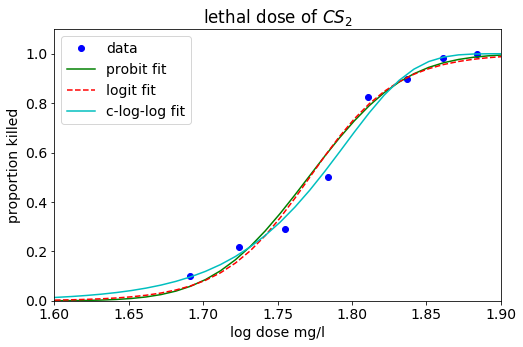

In [25]:
'''show result of several fits together with data'''
plt.figure( figsize=(8,5))
dgrid = np.linspace(-0.25, +0.25, 50+1)
xgrid = sm.add_constant(dgrid)
plt.plot(logdose, killed/n, 'bo', label='data')                         # data 
plt.plot(dgrid+mdose, pfit.predict(xgrid), 'g-', label='probit fit')    # ... for prediction
plt.plot(dgrid+mdose, zfit.predict(xgrid), 'r--', label='logit fit')    # ... for prediction
plt.plot(dgrid+mdose, efit.predict(xgrid), 'c-', label='c-log-log fit') # ... for prediction
plt.axis((1.6, 1.9, 0., 1.1))
plt.title('lethal dose of $CS_2$')
plt.xlabel('log dose mg/l')
plt.ylabel('proportion killed')
plt.legend(loc='upper left');

### Jedoch kein direkter Vergleich möglich!
Siehe Kapitel Modellvergleich und Deviance

Die Entscheidung für ein Modell muß aus der Theorie kommen.
- Ob das Modell dann angemessen ist, *das* kann getestet werden.

# Fragen?
----

# Kategoriale abhängige Variable

## Dichotome Variable
- Ja/Nein-Experiment
- Merkmal liegt vor/liegt nicht vor

# Experiment Wahrnehmungsschwelle 
- Gabor-Muster
- Kontrast 

$$\quad\text{contrast} \in \{0\dots 1\}$$ 
$$[100\%, 20\%, 4\%, 0.8\%]$$

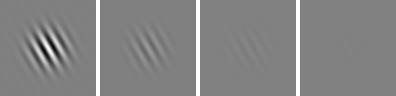

- Streifenbreite $\text{spatial frequency:}\;x\text{ cpd}$

## Durchführung
- 12 Kontraste
- 20 Wiederholungen jeweils

## Gemessener Datensatz


In [27]:
'''load matlab data with python'''
mat = scipy.io.loadmat('data/Heiko2014_02_19_1026.mat')   # Python can handle Matlab-data
print('type of dataset is {}'.format(type(mat)))          # as a dictionary
print(mat)

type of dataset is <class 'dict'>
{'contrasts': array([[ 0.003 ,  0.004 ,  0.005 ,  0.0055,  0.006 ,  0.0065,  0.007 ,
         0.0075,  0.008 ,  0.009 ,  0.01  ,  0.012 ]]), 'frequencies': array([[3]], dtype=uint8), 'results': array([[ 3.        ,  0.007     ,  1.        ,  1.        ,  0.08333333,
         0.51186373],
       [ 3.        ,  0.009     ,  2.        ,  2.        ,  0.25      ,
         0.47798932],
       [ 3.        ,  0.004     ,  1.        ,  1.        ,  0.75      ,
         0.37954401],
       ..., 
       [ 3.        ,  0.003     ,  2.        ,  2.        ,  0.16666667,
         0.4236919 ],
       [ 3.        ,  0.0065    ,  2.        ,  1.        ,  0.33333333,
         0.40862558],
       [ 3.        ,  0.009     ,  2.        ,  2.        ,  0.66666667,
         0.33939254]]), '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Feb 19 10:36:13 2014', '__globals__': [], '__version__': '1.0'}


In [28]:
'''get "results" part of data out of dictionary'''
results = mat['results']
print('shape of {} data is {}'.format(type(results), results.shape))
print('first 5 lines of data:\n{}'.format(results[:5]))

shape of <class 'numpy.ndarray'> data is (240, 6)
first 5 lines of data:
[[ 3.          0.007       1.          1.          0.08333333  0.51186373]
 [ 3.          0.009       2.          2.          0.25        0.47798932]
 [ 3.          0.004       1.          1.          0.75        0.37954401]
 [ 3.          0.008       1.          1.          0.83333333  0.32682218]
 [ 3.          0.0065      2.          1.          0.08333333  0.53323135]]


In [29]:
'''make a pandas DataFrame with speaking names'''
x = pd.DataFrame(mat['results'])
x.columns = ['spatialfreq', 'contrast', 'lpattern', 'lanswer', 'val', 'rt' ]
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
spatialfreq    240 non-null float64
contrast       240 non-null float64
lpattern       240 non-null float64
lanswer        240 non-null float64
val            240 non-null float64
rt             240 non-null float64
dtypes: float64(6)
memory usage: 11.3 KB


In [30]:
'''collect correct answers as 1, wrong ones as 0, together with useful data'''
# fill new variable with "wrong" answer for all,
x['answer'] = 0                                    
#  except for "right" answer
x.loc[x['lpattern']==x['lanswer'], 'answer'] = 1   
# of interest: answer correct as function of setup
mydata = x[['spatialfreq', 'contrast', 'answer']]  
print(mydata.head(5))
print('{} correct answers of {} total'.format(x['answer'].sum(), len(x)))


   spatialfreq  contrast  answer
0          3.0    0.0070       1
1          3.0    0.0090       1
2          3.0    0.0040       1
3          3.0    0.0080       1
4          3.0    0.0065       0
200 correct answers of 240 total


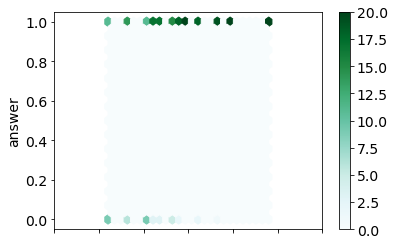

In [31]:
'''plot data with density'''
mydata.plot(kind='hexbin', x='contrast', y='answer', gridsize=25)
plt.xlim(0.0, 0.015)
plt.ylim(-0.05, 1.05);


## Gesucht: Wahrnehmungsschwelle
Festgelegte Schwelle zB. $75\%$

## Sinnvolle Darstellung der dichotomen Daten
Anteil der korrekten Antworten in Prozent

In [32]:
data_pc = mydata.groupby(['spatialfreq', 'contrast']).mean()
print(data_pc)


                      answer
spatialfreq contrast        
3.0         0.0030      0.55
            0.0040      0.70
            0.0050      0.55
            0.0055      0.85
            0.0060      0.85
            0.0065      0.75
            0.0070      0.90
            0.0075      1.00
            0.0080      0.90
            0.0090      0.95
            0.0100      1.00
            0.0120      1.00


In [33]:
data_pc = data_pc.reset_index()
print('after resetting, the index columns are back to {}'
      .format(data_pc.columns.values))


after resetting, the index columns are back to ['spatialfreq' 'contrast' 'answer']


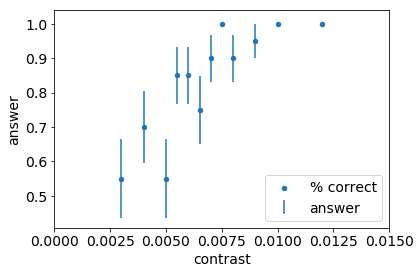

In [34]:
'''graph of means "percent correct answers" +/-sem'''
data_pc.plot(kind='scatter', x='contrast', y='answer', label='% correct')
std_pc = mydata.groupby(['spatialfreq', 'contrast']).sem()  # error of mean
plt.errorbar(x=data_pc['contrast'], y=data_pc['answer'],    
             yerr=std_pc['answer'], linestyle='')  # without connecting default line
plt.xlim(0.0, 0.015)
plt.legend(loc='lower right');


## Was ist die Wahrnehmungsschwelle?

- Zufall: Rauschen, Zwinkern, Aufmerksamkeit, Müdigkeit,
- Kein Zufall: Adaptation, Individualität (Genetik?), ...
- Modell
- Anpassen
- Auswerten

## Generalisiertes Lineares Modell
- unabhängige Variable: 
    - Kontrast
    - individuelle Versuchperson
    - Umgebungshelligkeit
    - Streifenmuster (Breite, Winkel, ....)
    - ...
- abhängige Variable: 
    - Binomialverteilung 0/1
    - Anteil Antwort "*percent correct*"
- Modellparameter
    - y-Achsenabschnitt
    - Abhängigkeit vom *Kontrast*
    - Logit-Link
- Gesucht
    - Wahrnehmungsschwelle

In [36]:
fit_lin = smf.glm('answer ~ contrast', mydata, 
                  family=sm.families.Binomial(link=sm.families.links.logit)
                 ).fit()
print(fit_lin.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 answer   No. Observations:                  240
Model:                            GLM   Df Residuals:                      238
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -90.718
Date:                Wed, 03 May 2017   Deviance:                       181.44
Time:                        10:23:49   Pearson chi2:                     209.
No. Iterations:                     6                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5850      0.598     -2.652      0.008      -2.756      -0.414
contrast     525.4312    104.698      5.019      0.0

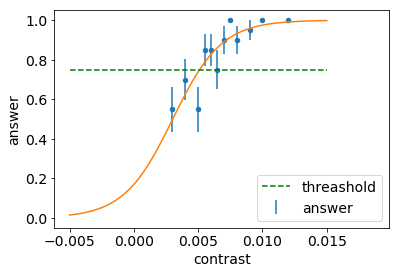

In [37]:
'''show logit-fit for %correct'''
data_pc.plot(kind='scatter', x='contrast', y='answer')  # dataframe's built in graphics
plt.errorbar(x=data_pc['contrast'], y=data_pc['answer'],    
             yerr=std_pc['answer'], linestyle='')       # without connecting default line
x_contrasts = np.linspace(-0.005, 0.015, 100+1)         # contrast values to use
x_df = pd.DataFrame(x_contrasts, columns=['contrast'])
y_resp = fit_lin.predict(exog = x_df)   # dataframe fullfills format for endog variable
plt.plot(x_contrasts, y_resp)           # show predicted result    
plt.plot([-0.005, 0.015], 2*[.75], 'g--', label='threashold')
plt.ylim(-0.05, 1.05)
plt.legend(loc='lower right');


# Fragen?

# Zusammenfassung GLM

Erweitert das Lineare Modell (siehe OLS in *Angewandte Statistik I*) um eine nicht-lineare Link-Funktion

$$\mathcal{E}(Y_i) = \mu_i = g^{-1}(\mathbf{x}_i^T \boldsymbol\beta)$$
$$Y_i \sim f(\mu_i, \dots)$$

- wenige Vorhersage-Parameter $\beta_j$
- zahlreiche Versuche $i\in[1\dots n]$
    - Versuchsbedingung $\mathbf{x}^T_i$ der Designmatrix $\mathbf{X}$
- Wahrscheinlichkeitsverteilung $f$ aus der Exponentialfamilie
- Link-Funktion $g$
    - Umkehrbar
    - verformt linearen Zusammenhang
    - Verteilung hält Grenzen ein (zB. bei dichotomen Antworten mit $y=\%\mathrm{correct} \in [0, \,1]$)

- Likelihood
    - Wahrscheinlichkeitsverteilung der Daten aus Sicht der Parameter
- Log-Likelihood
    - für Punkt-Schätzung von Parametern mittels Maximierung
    - für Intervall-Schätzung bei genäherter Verteilungsstatistik
    - Score Statistik $\mathbf{U}$ und
    - Informationsmatrix $\mathcal{I}$
        - IRLS
- Deviance
    - zum (hierarchischen) Modellvergleich
    - sinnvolle Erweiterung der Pearson Quadratfehlersumme

# Zusammenfassung Python `statsmodels`
### `statsmodels.formula.glm(...)`
beschreibt ein **lineares Datenmodell**

#### Eingabe Datensatz ` data=`
`pandas.DataFrame` mit *Variablennamen*
- unabhängige Variablen bzw. Designmatrix
- abhängigen Variablen

#### Eingabe Modell `formula=`
`patsy`-Formel mit abhängiger Variable ~ unabhängigen Variablen
- `'y ~ x1 + x2 + x3'`
- berücksichtigt bereits die Konstantenspalte der Designmatrix *intercept*
    - explizit ausschließen `'~ -1'`

### `statsmodels.GLM(...)`

#### Eingabe Daten
- `exog` : unabhängige Variablen in Spalten der Designmatrix $\mathbf{X}$ 
    - zusätzlich Konstante *intercept* anfügen `sm.add_constant(X)`
    - Bei *Interaktion* sind zusätzliche Spalten zu berechnen
- `endog` : abhängige Variable, gemessene Daten $\mathbf{y}$
- family

### `fit = statsmodels.___.fit()`

    fit.summary()              # lots of information in tabular form

#### Ausgabe Parametervektor
    fit.params                 # the point estimate of the parameter vector beta
    fit.bse                    # their standard deviation
    fit.conf_int().T           #   and confidence intervals
    fit.tvalues                # z-value (!) of Gauss statistics 
    fit.pvalues                #   and corresponding p-values

#### Ausgabe Fit-Werte
    fit.fittedvalues           # predicted values y according to model
    fit.predict(x1)            # calculated prediction for y at point x
                               #   x=dataframe for smf; x=exog for sm
                               #   default=exog -> fittedvalues
    fit.resid_response         # residua compared to data

#### Ausgabe Statistiken und Kennzahlen
    fit.df_model               # degree of freedom for model (without intercept)
    fit.df_resid               # degree of freedom for data
    fit.deviance               # scaled deviance (RSS for Gaussian)
